# TASK FOCUS 

Task Details

What has been published about medical care? What has been published concerning surge capacity and nursing homes? What has been published concerning efforts to inform allocation of scarce resources? What do we know about personal protective equipment? What has been published concerning alternative methods to advise on disease management? What has been published concerning processes of care? What do we know about the clinical characterization and management of the virus?

Specifically, we want to know what the literature reports about:

   - Resources to support skilled nursing facilities and long term care facilities.
   - Mobilization of surge medical staff to address shortages in overwhelmed communities
   - Age-adjusted mortality data for Acute Respiratory Distress Syndrome (ARDS) with/without other organ failure – particularly for viral etiologies
   - Extracorporeal membrane oxygenation (ECMO) outcomes data of COVID-19 patients
   - Outcomes data for COVID-19 after mechanical ventilation adjusted for age.
   - Knowledge of the frequency, manifestations, and course of extrapulmonary manifestations of COVID-19, including, but not limited to, possible cardiomyopathy and cardiac arrest.
   - Application of regulatory standards (e.g., EUA, CLIA) and ability to adapt care to crisis standards of care level.
   - Approaches for encouraging and facilitating the production of elastomeric respirators, which can save thousands of N95 masks.
   - Best telemedicine practices, barriers and faciitators, and specific actions to remove/expand them within and across state boundaries.
   - Guidance on the simple things people can do at home to take care of sick people and manage disease.
   - Oral medications that might potentially work.
   - Use of AI in real-time health care delivery to evaluate interventions, risk factors, and outcomes in a way that could not be done manually.
   - Best practices and critical challenges and innovative solutions and technologies in hospital flow and organization, workforce protection, workforce allocation, community-based support resources, payment, and supply chain management to enhance capacity, efficiency, and outcomes.
   - Efforts to define the natural history of disease to inform clinical care, public health interventions, infection prevention control, transmission, and clinical trials
   - Efforts to develop a core clinical outcome set to maximize usability of data across a range of trials
   - Efforts to determine adjunctive and supportive interventions that can improve the clinical outcomes of infected patients (e.g. steroids, high flow oxygen)

# OUR APPROACH

1. Find common section across BIOarticles
2. Discover language patterns within these sections, e.g. common words, tokens, sentences
    - We can already start doing this with the abstract since it is already filtered out
    - Can we find sentences similar to the topics described above? e.g. word2vec, universalsentenceencoders etc. 
3. Generate questions from articles
4. Generate answers from articles
5. Test these against the above research areas

In [8]:
import pandas as pd
import os
src_fldr = os.path.join('..','..','src')
df = pd.read_csv(os.path.join(src_fldr, 'metadata.csv'))
df = df.dropna(subset=['sha']).set_index('sha')
df

,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
sha,,,,,,,,,,,,,,
aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
212e990b378e8d267042753d5f9d4a64ea5e9869,Elsevier,Infectious diarrhea: Pathogenesis and risk fac...,10.1016/0002-9343(85)90367-5,NaN,2861742.0,els-covid,Abstract Our understanding of the pathogenesis...,1985-06-28,"Cantey, J.Robert",The American Journal of Medicine,NaN,NaN,True,custom_license
bf5d344243153d58be692ceb26f52c08e2bd2d2f,Elsevier,New perspectives on the pathogenesis of rheuma...,10.1016/0002-9343(88)90356-7,NaN,3052052.0,els-covid,Abstract In the pathogenesis of rheumatoid art...,1988-10-14,"Zvaifler, Nathan J.",The American Journal of Medicine,NaN,NaN,True,custom_license
ddd2ecf42ec86ad66072962081e1ce4594431f9c,Elsevier,Management of acute and chronic respiratory tr...,10.1016/0002-9343(88)90456-1,NaN,3048091.0,els-covid,"Abstract Pharyngitis, bronchitis, and pneumoni...",1988-09-16,"Ellner, Jerrold J.",The American Journal of Medicine,NaN,NaN,True,custom_license
a55cb4e724091ced46b5e55b982a14525eea1c7e,Elsevier,Acute bronchitis: Results of U.S. and European...,10.1016/0002-9343(92)90608-E,NaN,1621745.0,els-covid,"Abstract Acute bronchitis, an illness frequent...",1992-06-22,"Dere, Willard H.",The American Journal of Medicine,NaN,NaN,True,custom_license
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d4f00f66c732c292fcfc28b19f44daa2fa620901,PMC,Epidemiology and clinical profile of pathogens...,10.1371/journal.pone.0188325,PMC5693464,29149199.0,cc-by,This study aimed to identify a broad spectrum ...,2017 Nov 17,"Brini, Ines; Guerrero, Aida; Hannachi, Naila; ...",PLoS One,NaN,NaN,True,comm_use_subset
ec575d33c0d3b34af7644fcfed64af045a75ab63,Elsevier,Functional Analysis of the Transmembrane Domai...,10.1016/j.jmb.2008.12.029,PMC2750892,19121325.0,els-covid,"Abstract To enter cells, enveloped viruses use...",2009-02-13,"Bissonnette, Mei Lin Z.; Donald, Jason E.; DeG...",Journal of Molecular Biology,NaN,NaN,True,custom_license
7f8715a818bfd325bf4413d3c07003d7ce7b6f7e,PMC,Viral Entry Properties Required for Fitness in...,10.1128/mBio.00898-18,PMC6030562,29970463.0,cc-by,Human parainfluenza viruses cause a large burd...,2018 Jul 3,"Iketani, Sho; Shean, Ryan C.; Ferren, Marion; ...",mBio,NaN,NaN,True,comm_use_subset


In [10]:
df.has_full_text.value_counts()

True    28462
Name: has_full_text, dtype: int64

In [11]:
import glob
import os
import json
from tqdm import tqdm
import numpy as np
#adding filepaths to our dataframe
file_paths = {json.load(open(file, 'r'))['paper_id']:file for file in tqdm(glob.glob(os.path.join('..','..', 'src')+'*/*/*/*.JSON'))}
df['file_path'] = df.sha.apply(lambda x: file_paths.get(x, np.nan))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29315/29315 [00:26<00:00, 1090.34it/s]


In [12]:
sections = [text['section'] \
            for file in tqdm(glob.glob(os.path.join('..','..', 'src')+'*/*/*/*.JSON'))\
            for text in json.load(open(file, 'r'))['body_text']]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29315/29315 [00:27<00:00, 1083.84it/s]


In [13]:
from collections import Counter
sorted_sections = {k: v for k, v in sorted(Counter(sections).items(), key=lambda item: item[1], reverse=True)} 

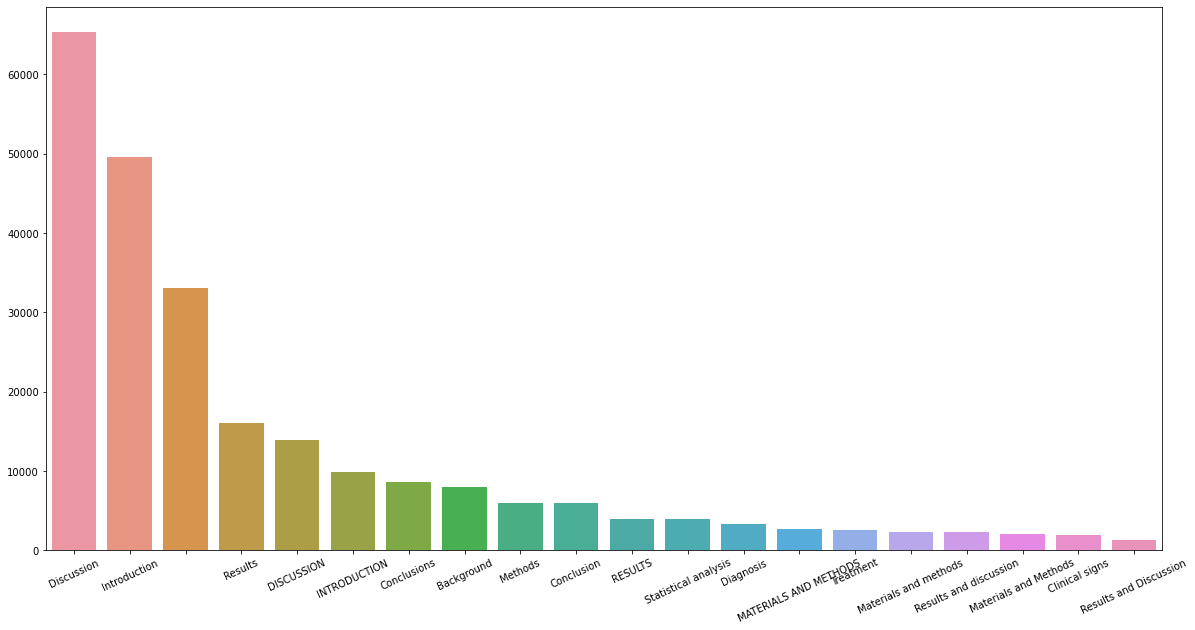

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(20, 10)
plt.xticks(rotation=25)
sns.barplot(x=list(sorted_sections.keys())[:20], y=list(sorted_sections.values())[:20])

In [16]:
from stop_words import get_stop_words

stop_words = get_stop_words('en')
dff = df.dropna(subset=['abstract'])
bow = [word for words in tqdm(dff.abstract.values) for word in words.lower().replace('abstract', '').split(' ') if word not in stop_words]

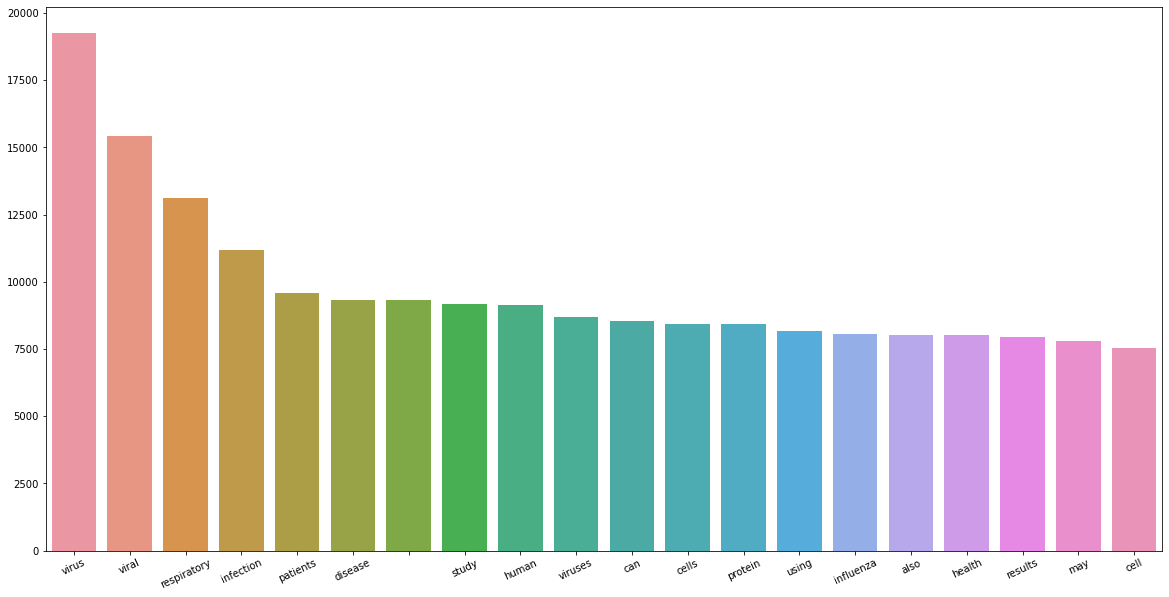

In [17]:
sorted_sections = {k: v for k, v in sorted(Counter(bow).items(), key=lambda item: item[1], reverse=True)} 
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(20, 10)
plt.xticks(rotation=25)
sns.barplot(x=list(sorted_sections.keys())[:20], y=list(sorted_sections.values())[:20])

In [61]:
dff.reset_index()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,...,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,mortality rate,extracorporeal membrane oxygenation (ECMO),vaccine,interventions,clinical outcome,phase
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",...,NaN,NaN,True,custom_license,False,False,False,False,False,4
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Elsevier,Infectious diarrhea: Pathogenesis and risk fac...,10.1016/0002-9343(85)90367-5,NaN,2861742.0,els-covid,Abstract Our understanding of the pathogenesis...,1985-06-28,"Cantey, J.Robert",...,NaN,NaN,True,custom_license,False,False,False,False,False,2
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,Elsevier,New perspectives on the pathogenesis of rheuma...,10.1016/0002-9343(88)90356-7,NaN,3052052.0,els-covid,Abstract In the pathogenesis of rheumatoid art...,1988-10-14,"Zvaifler, Nathan J.",...,NaN,NaN,True,custom_license,False,False,False,False,False,2
3,ddd2ecf42ec86ad66072962081e1ce4594431f9c,Elsevier,Management of acute and chronic respiratory tr...,10.1016/0002-9343(88)90456-1,NaN,3048091.0,els-covid,"Abstract Pharyngitis, bronchitis, and pneumoni...",1988-09-16,"Ellner, Jerrold J.",...,NaN,NaN,True,custom_license,False,False,False,False,False,2
4,a55cb4e724091ced46b5e55b982a14525eea1c7e,Elsevier,Acute bronchitis: Results of U.S. and European...,10.1016/0002-9343(92)90608-E,NaN,1621745.0,els-covid,"Abstract Acute bronchitis, an illness frequent...",1992-06-22,"Dere, Willard H.",...,NaN,NaN,True,custom_license,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,d4f00f66c732c292fcfc28b19f44daa2fa620901,PMC,Epidemiology and clinical profile of pathogens...,10.1371/journal.pone.0188325,PMC5693464,29149199.0,cc-by,This study aimed to identify a broad spectrum ...,2017-11-17,"Brini, Ines; Guerrero, Aida; Hannachi, Naila; ...",...,NaN,NaN,True,comm_use_subset,False,False,False,False,False,1
28458,ec575d33c0d3b34af7644fcfed64af045a75ab63,Elsevier,Functional Analysis of the Transmembrane Domai...,10.1016/j.jmb.2008.12.029,PMC2750892,19121325.0,els-covid,"Abstract To enter cells, enveloped viruses use...",2009-02-13,"Bissonnette, Mei Lin Z.; Donald, Jason E.; DeG...",...,NaN,NaN,True,custom_license,False,False,False,False,False,1
28459,7f8715a818bfd325bf4413d3c07003d7ce7b6f7e,PMC,Viral Entry Properties Required for Fitness in...,10.1128/mBio.00898-18,PMC6030562,29970463.0,cc-by,Human parainfluenza viruses cause a large burd...,2018-07-03,"Iketani, Sho; Shean, Ryan C.; Ferren, Marion; ...",...,NaN,NaN,True,comm_use_subset,False,False,False,False,False,1
28460,07e78e218a159c35e9599e3751a99551a271597b,Elsevier,Arenavirus reverse genetics: New approaches fo...,10.1016/j.virol.2011.01.013,PMC3057228,21324503.0,els-covid,"Abstract Several arenaviruses, chiefly Lassa v...",2011-03-15,"Emonet, Sebastien E.; Urata, Shuzo; de la Torr...",...,NaN,NaN,True,custom_license,False,False,False,False,False,1


In [30]:
from datetime import datetime
l=[]
def clean_time(val):
    try:
        return datetime.strptime(val, '%Y-%m-%d')
    except:
        try:
            return datetime.strptime(val, '%Y %b %d')
        except:
            try:
                return datetime.strptime(val, '%Y %b')
            except:
                try:
                    return datetime.strptime(val, '%Y')
                except:
                    try:
                        return datetime.strptime('-'.join(val.split(' ')[:3]), '%Y-%b-%d')
                    except Exception as e:
                        return None
dff = df.copy(deep=True)
dff.publish_time = df.publish_time.apply(clean_time)


0


(28462, 14)

In [31]:
dff.publish_time

sha
aecbc613ebdab36753235197ffb4f35734b5ca63   1973-08-31
212e990b378e8d267042753d5f9d4a64ea5e9869   1985-06-28
bf5d344243153d58be692ceb26f52c08e2bd2d2f   1988-10-14
ddd2ecf42ec86ad66072962081e1ce4594431f9c   1988-09-16
a55cb4e724091ced46b5e55b982a14525eea1c7e   1992-06-22
                                              ...    
d4f00f66c732c292fcfc28b19f44daa2fa620901   2017-11-17
ec575d33c0d3b34af7644fcfed64af045a75ab63   2009-02-13
7f8715a818bfd325bf4413d3c07003d7ce7b6f7e   2018-07-03
07e78e218a159c35e9599e3751a99551a271597b   2011-03-15
04bc03c90437934a75fc6fdc228817234ef84c3a   2017-11-08
Name: publish_time, Length: 28462, dtype: datetime64[ns]

In [64]:
dummy_keywords = ['mortality rate', 'extracorporeal membrane oxygenation (ECMO)', 'vaccine', 'interventions', 'clinical outcome', None]
len(dummy_keywords)



dff['tag'] = [dummy_keywords[np.random.choice(np.arange(0,6), p=[0.02, 0.02, 0.02, 0.02,0.02, 0.9])] for i in range(dff.shape[0])]


In [66]:
dff.tag.unique()

array(['clinical outcome', None, 'interventions', 'mortality rate',
       'vaccine', 'extracorporeal membrane oxygenation (ECMO)'],
      dtype=object)

In [48]:
dff.vaccine.describe()

count     28462
unique        2
top       False
freq      27987
Name: vaccine, dtype: object

In [81]:
dff['phase'] = [f'Phase {np.random.choice(np.arange(1,6), p=[0.5, 0.3, 0.1, 0.075, 0.025])}' for i in range(dff.shape[0])]


In [86]:
pv = pd.pivot_table(dff.reset_index(), values=['sha'], index=['tag', 'phase', 'publish_time'], aggfunc=np.count_nonzero).reset_index().rename(columns={'sha':'count'})
pd.pivot_table(dh.data.reset_index(), values=['sha'], index=['tag', 'phase', 'publish_time'], aggfunc=np.count_nonzero).reset_index().rename(columns={'sha':'count'})

In [89]:
import plotly.express as px
fig = px.scatter(pv, x="publish_time", y="phase",
         size="count", color="tag",
                 hover_name="tag", hover_data=['count'], title='Occurance of research tag per month per phase sized by number')
fig.show()


In [73]:
dff.publish_time = dff.publish_time.apply(lambda x: x.strftime('%Y-%m') if not pd.isna(x) else np.nan)

In [98]:
import pandas as pd
import os
import numpy as np

class dummyDataHandler():
	def __init__(self):
		src_fldr = os.path.join('..', '..','src')
		df = pd.read_csv(os.path.join(src_fldr, 'metadata.csv'))
		df = df.dropna(subset=['sha']).set_index('sha')
		self.data = df
		self.data.publish_time = self.data.publish_time.apply(clean_time)
		self.data.publish_time = self.data.publish_time.apply(lambda x: x.strftime('%Y-%m') if not pd.isna(x) else np.nan)
		self.dummy_keywords = ['mortality rate', 'extracorporeal membrane oxygenation (ECMO)', 'vaccine', 'interventions', 'clinical outcome', np.nan]
		self.setUp()

	def setUp(self):
		self.data['tag'] = [self.dummy_keywords[np.random.choice(np.arange(0,6), p=[0.02, 0.02, 0.02, 0.02,0.02, 0.9])] for i in range(self.data.shape[0])]
		self.data['phase'] = [np.random.choice(np.arange(1,6), p=[0.5, 0.3, 0.1, 0.075, 0.025]) for i in range(self.data.shape[0])]

	def get_pivot(self):
		pv = pd.pivot_table(self.data.reset_index(), values=['sha'], index=['tag', 'phase', 'publish_time'], aggfunc=np.count_nonzero).reset_index().rename(columns={'sha':'count'})
		print(pv)
		return pv


def clean_time(val):
    try:
        return datetime.strptime(val, '%Y-%m-%d')
    except:
        try:
            return datetime.strptime(val, '%Y %b %d')
        except:
            try:
                return datetime.strptime(val, '%Y %b')
            except:
                try:
                    return datetime.strptime(val, '%Y')
                except:
                    try:
                        return datetime.strptime('-'.join(val.split(' ')[:3]), '%Y-%b-%d')
                    except Exception as e:
                        return None

In [100]:
fig = px.scatter(dummyDataHandler().get_pivot(), x="publish_time", y="phase",
         size="count", color="tag",
                 hover_name="tag", hover_data=['count'], title='Occurance of research tag per month per phase sized by #Occurances')
fig.show()

                   tag  phase publish_time  count
0     clinical outcome      1      1986-12      2
1     clinical outcome      1      1988-12      1
2     clinical outcome      1      1989-05      1
3     clinical outcome      1      1990-07      1
4     clinical outcome      1      1990-09      1
...                ...    ...          ...    ...
1827           vaccine      5      2016-02      1
1828           vaccine      5      2016-03      1
1829           vaccine      5      2016-06      1
1830           vaccine      5      2016-08      1
1831           vaccine      5      2020-02      1

[1832 rows x 4 columns]
